# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [90]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score,
                             precision_recall_curve, roc_curve, roc_auc_score)
from sklearn.neighbors import KNeighborsClassifier

In [91]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.

#Complementos con la dirección especifica de la base de datos que queremos.
MEDICAMENTOS = "drug200.csv"
df = pd.read_csv(MEDICAMENTOS)

In [92]:
# Visualiza el DataFrame
print(df.head())
print(df.info())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [93]:
# Obten información de los datos.
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())
print(df.Sex.value_counts())

Max Age: 74
Min Age: 15
Sex
M    104
F     96
Name: count, dtype: int64


## <span style="color:green">2. Análisis de cada Variable</span>

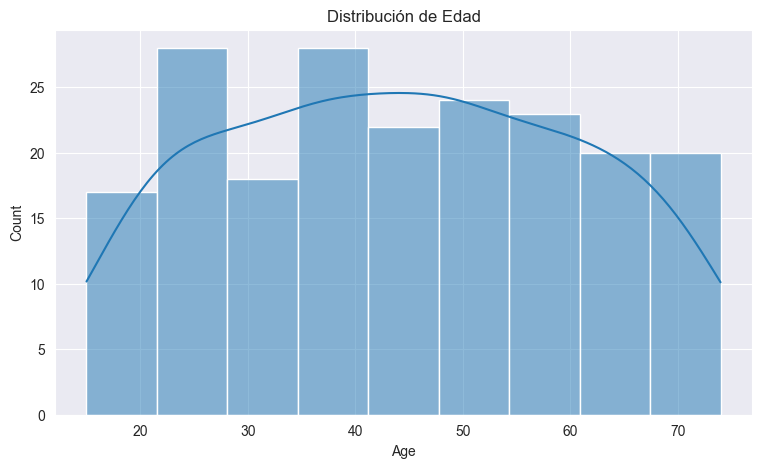

In [94]:
#Importa seaborn para tener gráficos más chidos 

#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen

#Crea un displot para de la edad (por ser una variable numérica)
plt.figure(figsize=(9,5))
sns.histplot(df.Age, kde=True)
plt.title("Distribución de Edad")
plt.show()

Sex
M    104
F     96
Name: count, dtype: int64


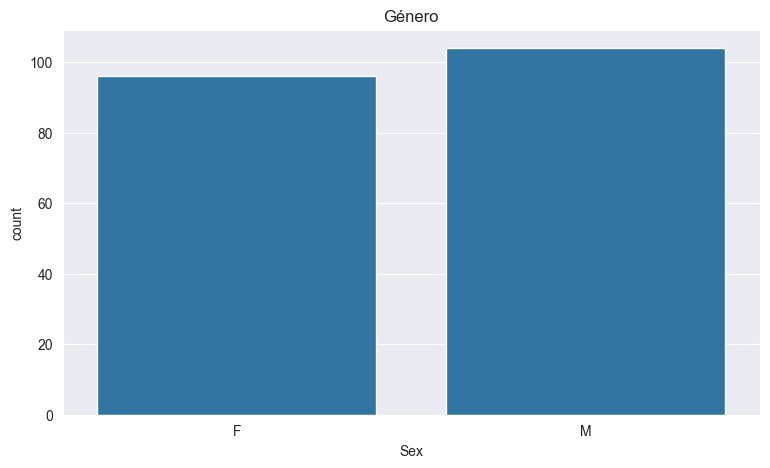

In [95]:
# Género: cuenta cuántos hombres y mujeres hay
print(df.Sex.value_counts())
plt.figure(figsize=(9,5))
sns.countplot(x="Sex", data=df)
plt.title("Género")
plt.show()


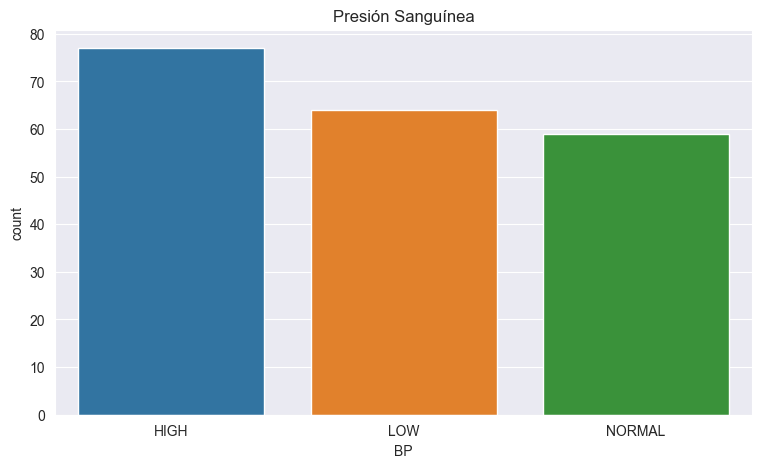

In [96]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize=(9,5))
sns.countplot(x="BP", data=df, hue="BP")
plt.title("Presión Sanguínea")
plt.show()

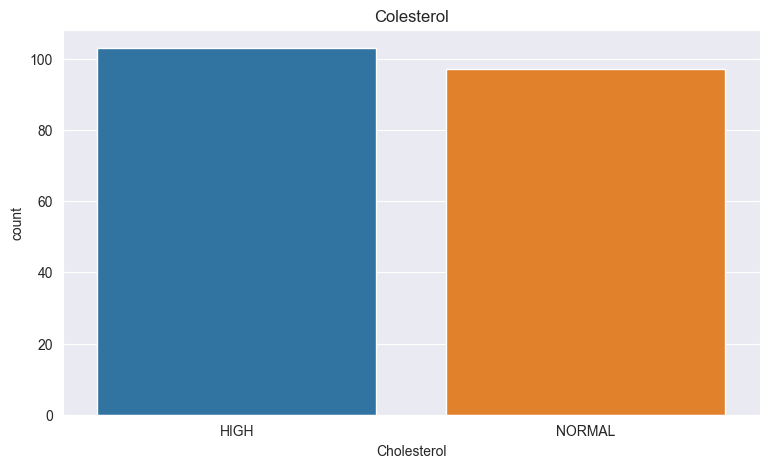

In [97]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize=(9,5))
sns.countplot(x="Cholesterol", data=df, hue="Cholesterol")
plt.title("Colesterol")
plt.show()

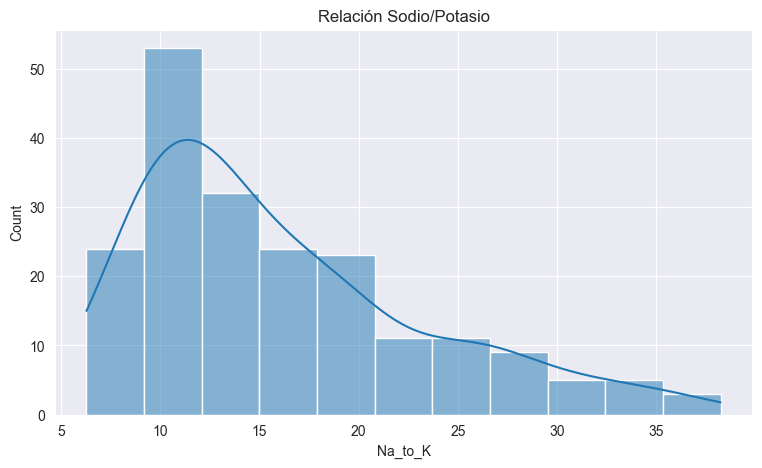

In [98]:
# Crea un displot para Sodio Potasio
plt.figure(figsize=(9,5))
sns.histplot(df.Na_to_K, kde=True)
plt.title("Relación Sodio/Potasio")
plt.show()


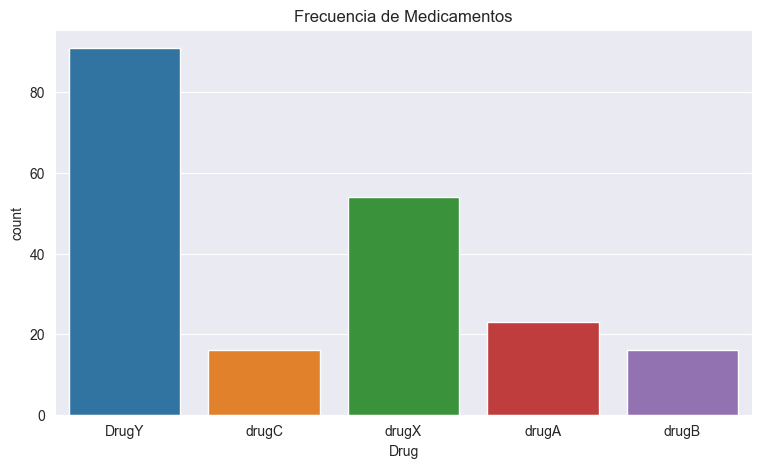

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [99]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize=(9,5))
sns.countplot(x="Drug", data=df, hue="Drug")
plt.title("Frecuencia de Medicamentos")
plt.show()
#Cuenta los medicamentos
print(df.Drug.value_counts())

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


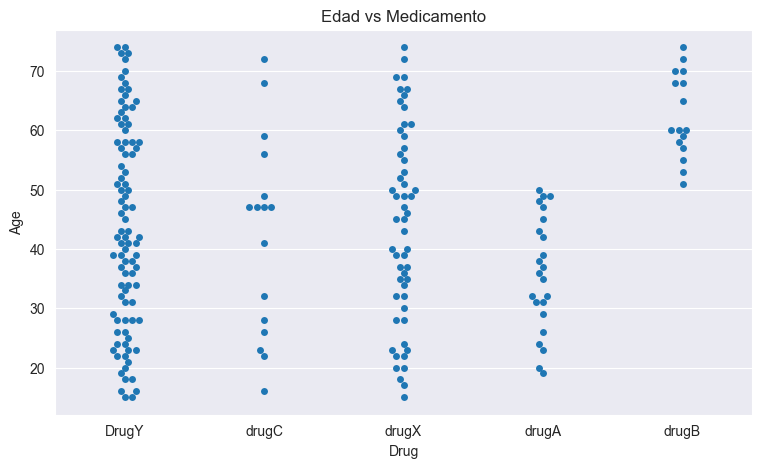

In [100]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y="Age", data=df)
plt.title("Edad vs Medicamento")
plt.show()


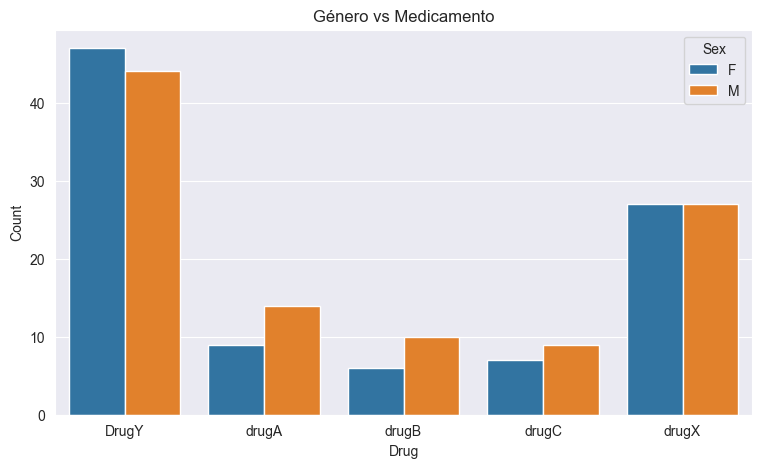

In [101]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas

#Grafica la tablita anterior con una gráfica de barras
df_sex_drug = df.groupby(["Drug","Sex"]).size().reset_index(name="Count")
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y="Count", hue="Sex", data=df_sex_drug)
plt.title("Género vs Medicamento")
plt.show()


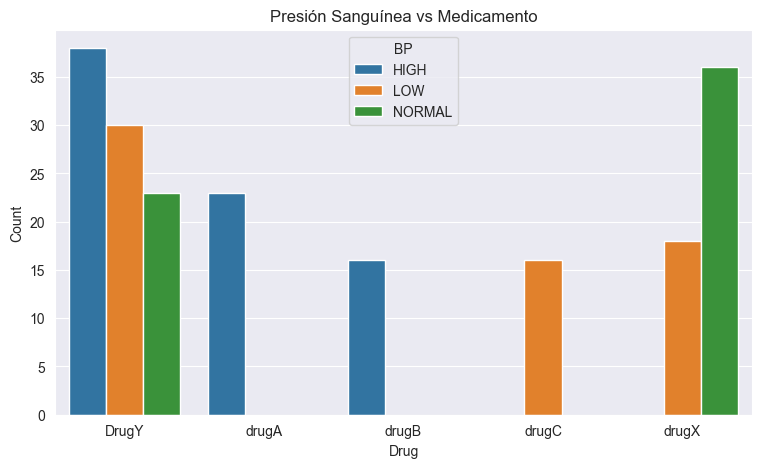

In [102]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_bp_drug = df.groupby(["Drug","BP"]).size().reset_index(name="Count")
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y="Count", hue="BP", data=df_bp_drug)
plt.title("Presión Sanguínea vs Medicamento")
plt.show()

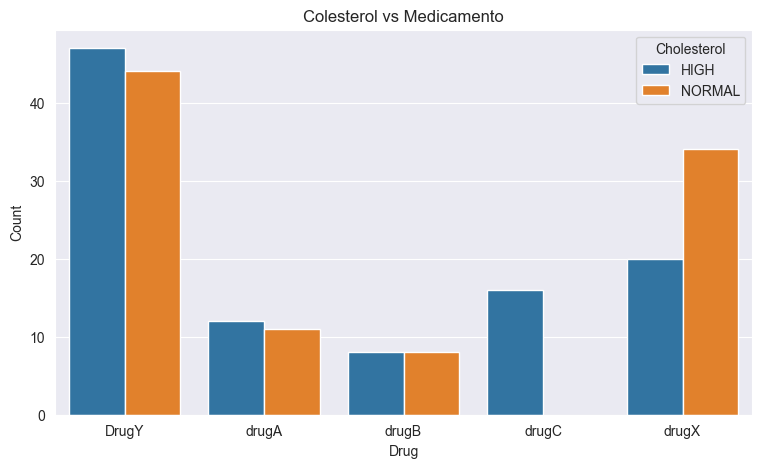

In [103]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_ch_drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name="Count")
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y="Count", hue="Cholesterol", data=df_ch_drug)
plt.title("Colesterol vs Medicamento")
plt.show()

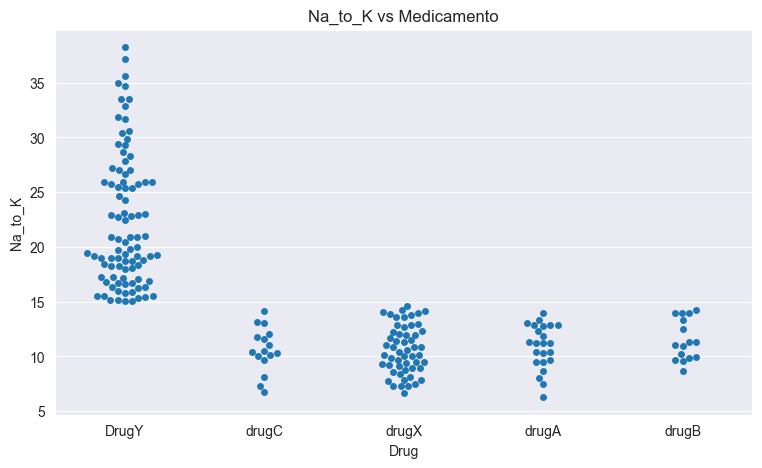

In [104]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y="Na_to_K", data=df)
plt.title("Na_to_K vs Medicamento")
plt.show()

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [105]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
categoricas = ["Sex", "BP", "Cholesterol", "Drug"]

# Creamos un LabelEncoder
le = LabelEncoder()

# Aplicamos a cada columna categórica
for col in categoricas:
    df[col] = le.fit_transform(df[col])

# Mostramos el resultado para confirmar
print(df.head())

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     0
1   47    1   1            0   13.093     3
2   47    1   1            0   10.114     3
3   28    0   2            0    7.798     4
4   61    0   1            0   18.043     0


In [106]:
# Crear set de entrenamiento y set de prueba
x = df.drop(["Drug"], axis=1)
y = df["Drug"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Tamaño del set de entrenamiento: {x_train.shape}")
print(f"Tamaño del set de prueba: {x_test.shape}")

Tamaño del set de entrenamiento: (160, 5)
Tamaño del set de prueba: (40, 5)


El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [107]:
## Crear modelo para medicamento
y_train_Y = (y_train == 0)
y_test_Y = (y_test == 0)
y_train_Y.head()

79     False
197    False
38     False
24      True
122     True
Name: Drug, dtype: bool

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [108]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_Y)

# Predecir para un humano aleatorio con Na_to_K bajo (no debería ser DrugY)
sgd_clf.predict([[47, 1, 1, 0, 8.0]])

C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [109]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado
some_human = x_test.iloc[1] # Tomamos el segundo paciente del set de prueba
print(f"Características del paciente:\n{some_human}")
print("\n")
print(f"Predicción del modelo: {sgd_clf.predict([some_human.values])}")
print(f"Resultado real (es DrugY?): {y_test_Y.iloc[1]}")

Características del paciente:
Age            16.000
Sex             0.000
BP              0.000
Cholesterol     1.000
Na_to_K        15.516
Name: 15, dtype: float64


Predicción del modelo: [ True]
Resultado real (es DrugY?): True


C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [110]:
# Realiza una Cross validation/K-Folds
cross_val_score(sgd_clf, x_train, y_train_Y, cv=3, scoring="accuracy")

array([0.72222222, 0.47169811, 0.62264151])


**cv:** número de dobleses

**scoring:** accuracy (será nuestra medida de desempeño)

In [111]:
# Modelo que nunca es Y
from sklearn.base import BaseEstimator
class NeverYClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_y_clf = NeverYClassifier()
cross_val_score(never_y_clf, x_train, y_train_Y, cv=3, scoring="accuracy")

array([0.57407407, 0.52830189, 0.47169811])

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [112]:
# Matriz de confusión
#Importar cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_Y, cv=3)

#Importar confusion_matrix
confusion_matrix(y_train_Y, y_train_pred)


array([[35, 49],
       [14, 62]])

**Verdaderos Negativos**: esquina superior izquierda

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [113]:
#Importar precision_score y recall_score
p = precision_score(y_train_Y, y_train_pred)
r = recall_score(y_train_Y, y_train_pred)
p, r

(0.5585585585585585, 0.8157894736842105)

In [114]:
#Cambiar de clasificador
#Importar RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
y_train_pred_rfc = cross_val_predict(rfc, x_train, y_train_Y, cv=3)

#Hacer la matriz de confusión otra vez
confusion_matrix(y_train_Y, y_train_pred_rfc)


array([[84,  0],
       [ 0, 76]])

In [115]:
#Calcular la precisión y recall con el nuevo clasificador
p_rfc = precision_score(y_train_Y, y_train_pred_rfc)
r_rfc = recall_score(y_train_Y, y_train_pred_rfc)
p_rfc, r_rfc

(1.0, 1.0)

In [116]:
#Calcular F1
f1_sgd = f1_score(y_train_Y, y_train_pred)
f1_rfc = f1_score(y_train_Y, y_train_pred_rfc)
print(f"F1 Score SGD: {f1_sgd}")
print(f"F1 Score Random Forest: {f1_rfc}")

F1 Score SGD: 0.6631016042780749
F1 Score Random Forest: 1.0


***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [117]:
#Puntación de un paciente aleatorio
y_scores_sgd = cross_val_predict(sgd_clf, x_train, y_train_Y, cv=3, method="decision_function")

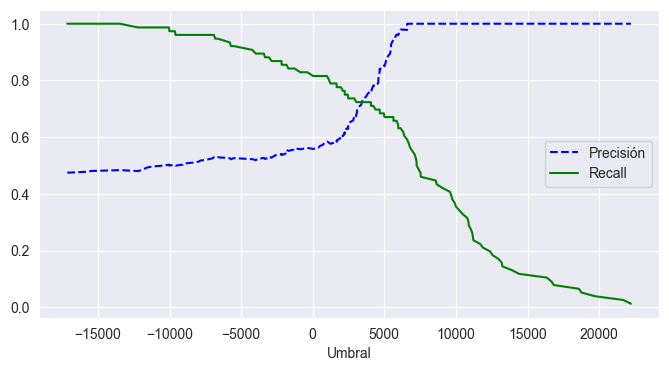

In [118]:
#Graficar la precisión y recall
precisions, recalls, thresholds = precision_recall_curve(y_train_Y, y_scores_sgd)

#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precisión")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Umbral")
    plt.legend(loc="center right")
    plt.grid(True)

#Graficar la precisión y recall, ahora si
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [119]:
#Supon que ya lo pensaste y querías un umbral  90
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(f"Umbral para 90% de precisión: {threshold_90_precision}")

y_train_pred_90 = (y_scores_sgd >= threshold_90_precision)

Umbral para 90% de precisión: 5464.036500583023


In [120]:
#Arroja la precisión y recall para un umbral de 90
p_90 = precision_score(y_train_Y, y_train_pred_90)
r_90 = recall_score(y_train_Y, y_train_pred_90)
print(f"Precisión: {p_90}, Recall: {r_90}")

Precisión: 0.9107142857142857, Recall: 0.6710526315789473


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [121]:
#Importar roc_curve
fpr, tpr, thresholds = roc_curve(y_train_Y, y_scores_sgd)

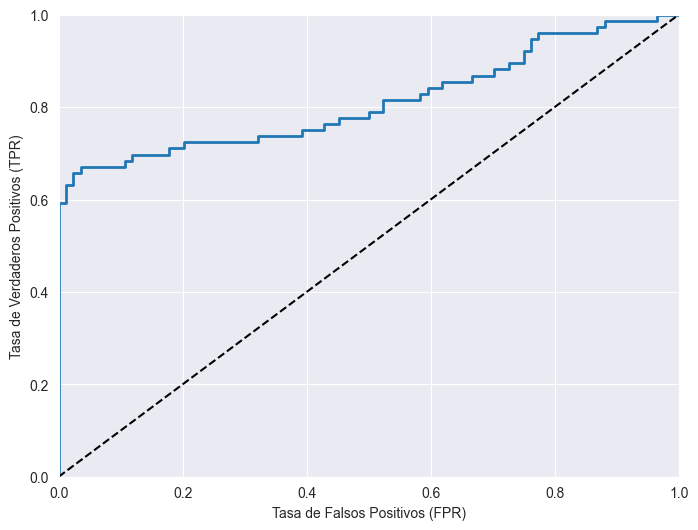

In [122]:
#Graficar la curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # diagonal punteada
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')

#Poner una cuadrícula
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [123]:
#Calcular el puntaje de la curva
roc_auc_sgd = roc_auc_score(y_train_Y, y_scores_sgd)
print(f"ROC AUC Score (SGD): {roc_auc_sgd}")

ROC AUC Score (SGD): 0.81218671679198


In [124]:
#Compararlo con el modelo de random forest
y_probas_forest = cross_val_predict(rfc, x_train, y_train_Y, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba de clase positiva
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_Y, y_scores_forest)

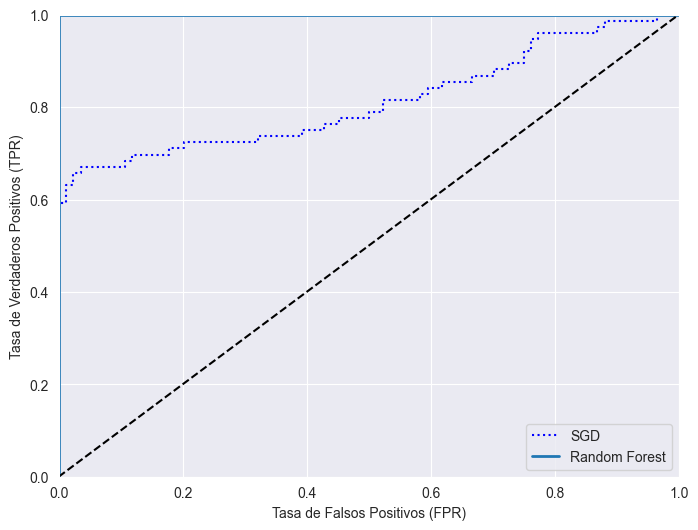

In [125]:
#Graficar la curva ROC y la predicción de random forest
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [126]:
#Calcular el puntaje (área bajo la curva) de random forest
roc_auc_rfc = roc_auc_score(y_train_Y, y_scores_forest)
print(f"ROC AUC Score (Random Forest): {roc_auc_rfc}")

ROC AUC Score (Random Forest): 1.0


***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [127]:
# Importar SVC=Support Vector Classifier
svm_clf = SVC(random_state=42)
svm_clf.fit(x_train, y_train)  # Entrenar con el y_train original (multiclase)

#Predecir a un humano aleatorio para ver que todo este funcionando bien
print(f"Predicción: {svm_clf.predict([x_test.iloc[0].values])}")
print(f"Real: {y_test.iloc[0]}")


Predicción: [4]
Real: 4


C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [128]:
#Utilizar decision_function para observar los puntajes de cada medicina
some_scores = svm_clf.decision_function([x_test.iloc[0].values])
print(some_scores)

#Decidirá por el qué tenga mayor puntaje
print(f"Índice del mayor puntaje: {np.argmax(some_scores)}")
print(f"Clases del modelo: {svm_clf.classes_}")

[[ 3.19474416  2.14653743 -0.26354952  0.77673583  4.26111114]]
Índice del mayor puntaje: 4
Clases del modelo: [0 1 2 3 4]


C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [129]:
#Ahora, utiliza el clasificador multiclase
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train, y_train)

#Predecir a un humano ahora con este clasificador
print(f"Predicción OVR: {ovr_clf.predict([x_test.iloc[0].values])}")


Predicción OVR: [4]


C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X 

In [130]:
#Utilizar decision_function para observar los puntajes de cada medicina
print(ovr_clf.decision_function([x_test.iloc[0].values]))

[[-0.92645698 -0.99701695 -1.05434451 -0.99990678 -0.81425011]]


C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X 

In [131]:
#campararlo con los datos obtenidos de sgd.fit
sgd_clf.fit(x_train, y_train)
print(f"Predicción SGD: {sgd_clf.predict([x_test.iloc[0].values])}")
print(f"Puntajes SGD: {sgd_clf.decision_function([x_test.iloc[0].values])}")

Predicción SGD: [4]
Puntajes SGD: [[-1318.52125695 -3677.0456593  -5147.62290697 -4171.04054494
    119.79250357]]


C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\brira\PycharmProjects\Modelo de Clasificación\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


***

## <span style="color:green">8. Analizar Errores</span>

In [132]:
#Hacer un clasificador de random forest
# (rfc ya fue definido y entrenado en la sección de clasificación binaria)
# Para multiclase, lo re-entrenamos con y_train
rfc.fit(x_train, y_train)
y_train_pred_rfc_multi = cross_val_predict(rfc, x_train, y_train, cv=3)

In [133]:
#Utilizar la matriz de confusión
conf_mx_rfc_multi = confusion_matrix(y_train, y_train_pred_rfc_multi)
print(conf_mx_rfc_multi)

[[76  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  1 12  0  0]
 [ 0  0  0  7  4]
 [ 0  0  0  0 43]]


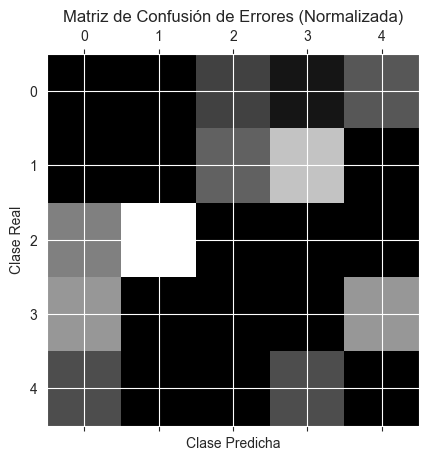

In [134]:
#utilizar ahora SGD
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

y_train_pred_sgd_multi = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx_sgd_multi = confusion_matrix(y_train, y_train_pred_sgd_multi)

# Para visualizar mejor los errores, los normalizamos
row_sums = conf_mx_sgd_multi.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_sgd_multi / row_sums
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title("Matriz de Confusión de Errores (Normalizada)")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")
plt.show()